In [ ]:
import pandas as pd
import random

# Define the domains for each variable
traveller_profiles = ['Family', 'Friends Groups', 'Individuals', 'Corporates', 'Institutions']
choices = ['Adventures', 'Spirituals', 'Nature Lover', 'Cultural']
source_destinations = ['Mountain', 'Beaches', 'Hill Stations', 'Adventure', 'Desert Area', 'Spiritual']
modes_of_travel = ['Car', 'Bus', 'Train', 'Plane']

# Create an empty DataFrame
data = pd.DataFrame(columns=['Traveller Profile Type', 'Choice/Preference', 'Source Destination', 'Mode of Travel', 'Budget'])

# Generate 100,000 entries
for _ in range(100000):
    profile = random.choice(traveller_profiles)
    choice = random.choice(choices)
    source_dest = random.choice(source_destinations)
    travel_mode = random.choice(modes_of_travel)
    budget = random.randint(10000, 10000000)

    data = data.append({'Traveller Profile Type': profile,
                        'Choice/Preference': choice,
                        'Source Destination': source_dest,
                        'Mode of Travel': travel_mode,
                        'Budget': budget}, ignore_index=True)




In [5]:
data.to_csv('file2.csv', header=False, index=False)


In [6]:
from google.colab import files
files.download('file2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [36]:
from google.colab import drive
drive.mount("/content/gdrive")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [37]:
import pandas as pd
a=pd.read_csv('/content/gdrive/My Drive/file2.csv')

In [38]:
df=a

In [ ]:
data

,Traveller Profile Type,Choice/Preference,Source Destination,Mode of Travel,Budget
0,Friends Groups,Adventures,Hill Stations,Train,6618134
1,Friends Groups,Spirituals,Beaches,Plane,1227293
2,Individuals,Cultural,Spiritual,Car,1481984
3,Family,Nature Lover,Hill Stations,Train,7829607
4,Family,Cultural,Desert Area,Bus,3851542
...,...,...,...,...,...
99995,Friends Groups,Spirituals,Mountain,Bus,4981806
99996,Individuals,Adventures,Desert Area,Plane,2034903
99997,Corporates,Adventures,Spiritual,Plane,5657143
99998,Family,Spirituals,Mountain,Car,3522406


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**EDA**

In [39]:
df=data

NameError: ignored

In [14]:
df.head()


,Family,Adventures,Desert Area,Plane,7512181
0,Individuals,Cultural,Beaches,Car,5712578
1,Friends Groups,Nature Lover,Mountain,Car,8843996
2,Friends Groups,Cultural,Mountain,Train,244011
3,Individuals,Nature Lover,Beaches,Train,324341
4,Corporates,Nature Lover,Adventure,Plane,1199741


In [ ]:
df.describe()

,Traveller Profile Type,Choice/Preference,Source Destination,Mode of Travel,Budget
count,100000,100000,100000,100000,100000
unique,5,4,6,4,99512
top,Friends Groups,Adventures,Beaches,Bus,7420916
freq,20161,25237,16746,25156,2


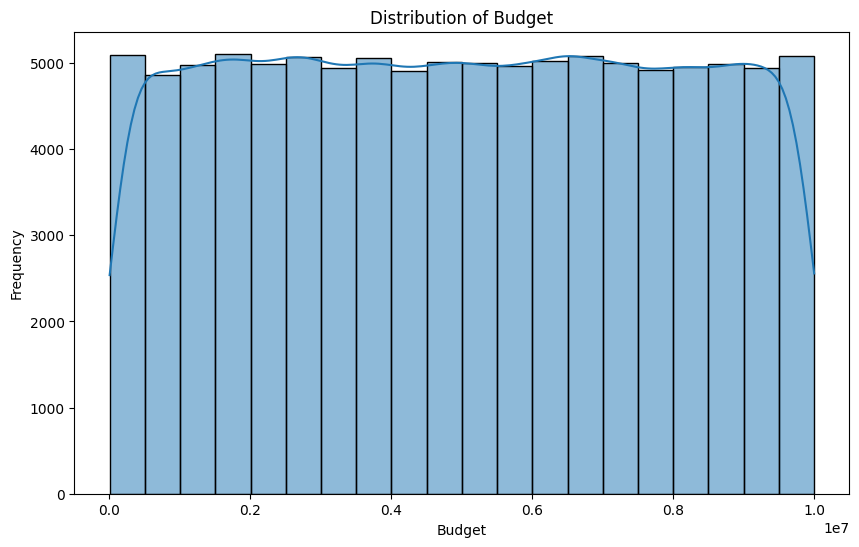

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df['Budget'], bins=20, kde=True)
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.title('Distribution of Budget')
plt.show()


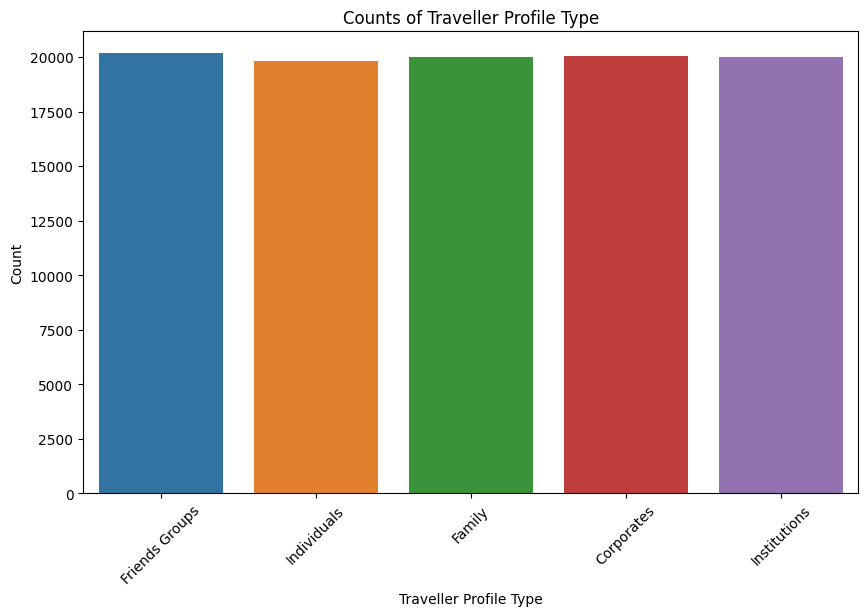

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Traveller Profile Type')
plt.xticks(rotation=45)
plt.xlabel('Traveller Profile Type')
plt.ylabel('Count')
plt.title('Counts of Traveller Profile Type')
plt.show()

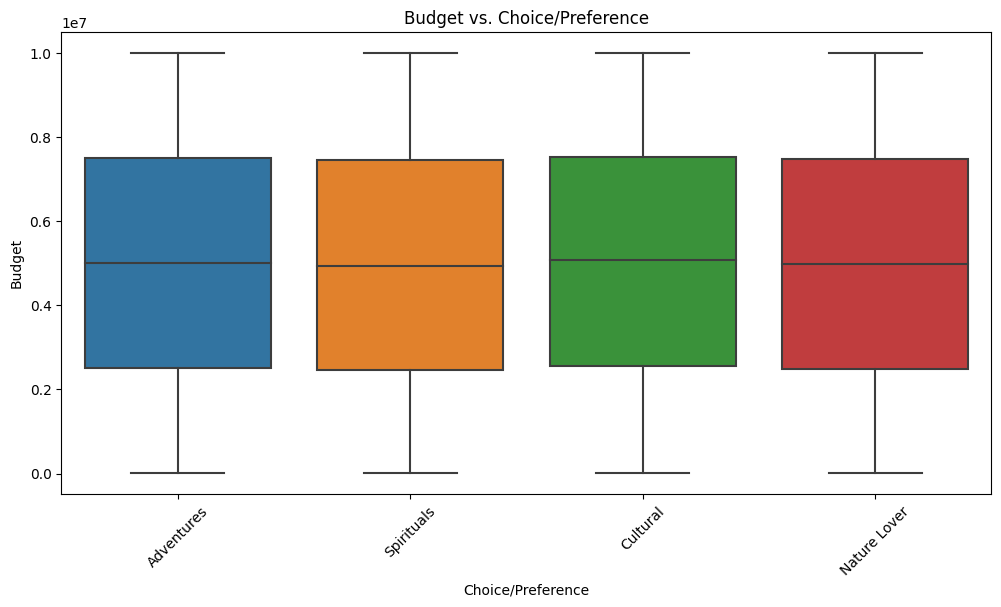

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Choice/Preference', y='Budget')
plt.xticks(rotation=45)
plt.xlabel('Choice/Preference')
plt.ylabel('Budget')
plt.title('Budget vs. Choice/Preference')
plt.show()

In [4]:
df=data

Catogorical values

In [26]:
import pandas as pd

# Load the dataset

# Encode 'Traveller Profile Type' using one-hot encoding
df = pd.get_dummies(df, columns=['Traveller Profile Type'], prefix='Profile')

# Encode 'Choice/Preference' using one-hot encoding
df = pd.get_dummies(df, columns=['Choice/Preference'], prefix='Preference')

# Encode 'Source Destination' using one-hot encoding
df = pd.get_dummies(df, columns=['Source Destination'], prefix='Destination')

# Encode 'Mode of Travel' using one-hot encoding
df = pd.get_dummies(df, columns=['Mode of Travel'], prefix='TravelMode')

# Display the first few rows of the encoded DataFrame
df.head()


,Budget,Profile_Corporates,Profile_Family,Profile_Friends Groups,Profile_Individuals,Profile_Institutions,Preference_Adventures,Preference_Cultural,Preference_Nature Lover,Preference_Spirituals,Destination_Adventure,Destination_Beaches,Destination_Desert Area,Destination_Hill Stations,Destination_Mountain,Destination_Spiritual,TravelMode_Bus,TravelMode_Car,TravelMode_Plane,TravelMode_Train
0,6618134,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
1,1227293,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
2,1481984,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
3,7829607,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
4,3851542,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0


In [40]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Encode 'Traveller Profile Type' using label encoding
df['Traveller Profile Type'] = label_encoder.fit_transform(df['Traveller Profile Type'])

# Encode 'Choice/Preference' using label encoding
df['Choice/Preference'] = label_encoder.fit_transform(df['Choice/Preference'])

# Encode 'Source Destination' using label encoding
df['Source Destination'] = label_encoder.fit_transform(df['Source Destination'])

# Encode 'Mode of Travel' using label encoding
df['Mode of Travel'] = label_encoder.fit_transform(df['Mode of Travel'])

# Display the first few rows of the DataFrame with label encoding
print(df.head())


   Traveller Profile Type  Choice/Preference  Source Destination  \
0                       1                  0                   2   
1                       3                  1                   1   
2                       2                  2                   4   
3                       2                  1                   4   
4                       3                  2                   1   

   Mode of Travel   Budget  
0               2    37927  
1               1  5712578  
2               1  8843996  
3               3   244011  
4               3   324341  


In [30]:
df

,Traveller Profile Type,Choice/Preference,Source Destination,Mode of Travel,Budget
0,2,0,3,3,6618134
1,2,3,1,2,1227293
2,3,1,5,1,1481984
3,1,2,3,3,7829607
4,1,1,2,0,3851542
...,...,...,...,...,...
99995,2,3,4,0,4981806
99996,3,0,2,2,2034903
99997,0,0,5,2,5657143
99998,1,3,4,1,3522406


<ipython-input-31-182fd031f822>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


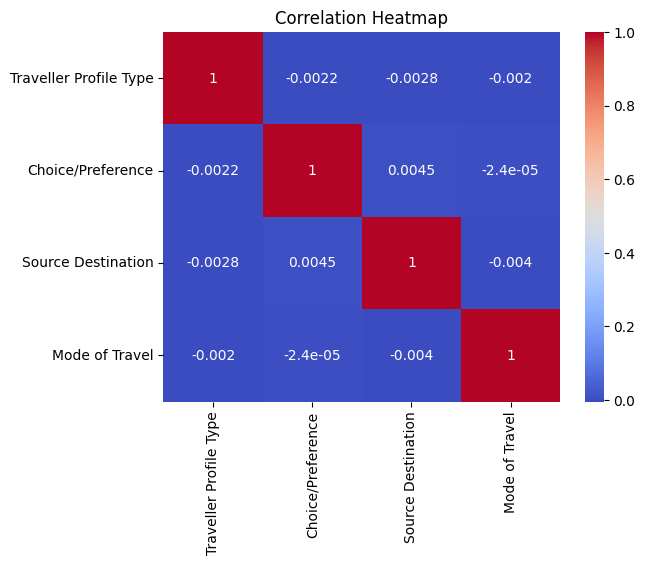

In [31]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Load the dataset

# Encode 'Source Destination' using label encoding
label_encoder = LabelEncoder()
df['Source Destination'] = label_encoder.fit_transform(df['Source Destination'])

# Split the data into features (X) and the target variable (y)
X = df.drop(columns=['Source Destination'])
y = df['Source Destination']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
# Initialize classifiers
classifiers = {
    'Decision_Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

# Train and evaluate each classifier
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name}: Accuracy = {accuracy:.2f}')
    print(classification_report(y_test, y_pred))


Decision_Tree: Accuracy = 0.17
              precision    recall  f1-score   support

           0       0.18      0.18      0.18      3349
           1       0.16      0.15      0.16      3263
           2       0.16      0.16      0.16      3375
           3       0.17      0.17      0.17      3294
           4       0.18      0.18      0.18      3472
           5       0.15      0.16      0.16      3247

    accuracy                           0.17     20000
   macro avg       0.17      0.17      0.17     20000
weighted avg       0.17      0.17      0.17     20000



KeyboardInterrupt: ignored

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize classifiers
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
random_forest_classifier = RandomForestClassifier(random_state=42)
k_neighbors_classifier = KNeighborsClassifier()
logistic_regression_classifier = LogisticRegression(max_iter=1000, random_state=42)

# Train and evaluate Decision Tree classifier
decision_tree_classifier.fit(X_train, y_train)
y_pred_dt = decision_tree_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print('Decision_Tree: Accuracy = {:.2f}'.format(accuracy_dt))
print(classification_report(y_test, y_pred_dt))

# Train and evaluate Random Forest classifier
random_forest_classifier.fit(X_train, y_train)
y_pred_rf = random_forest_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print('Random Forest: Accuracy = {:.2f}'.format(accuracy_rf))
print(classification_report(y_test, y_pred_rf))

# Train and evaluate K-Nearest Neighbors classifier
k_neighbors_classifier.fit(X_train, y_train)
y_pred_knn = k_neighbors_classifier.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print('K-Nearest Neighbors: Accuracy = {:.2f}'.format(accuracy_knn))
print(classification_report(y_test, y_pred_knn))

# Train and evaluate Logistic Regression classifier
logistic_regression_classifier.fit(X_train, y_train)
y_pred_lr = logistic_regression_classifier.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print('Logistic Regression: Accuracy = {:.2f}'.format(accuracy_lr))
print(classification_report(y_test, y_pred_lr))


Decision_Tree: Accuracy = 0.17
              precision    recall  f1-score   support

           0       0.18      0.18      0.18      3349
           1       0.16      0.15      0.16      3263
           2       0.16      0.16      0.16      3375
           3       0.17      0.17      0.17      3294
           4       0.18      0.18      0.18      3472
           5       0.15      0.16      0.16      3247

    accuracy                           0.17     20000
   macro avg       0.17      0.17      0.17     20000
weighted avg       0.17      0.17      0.17     20000

Random Forest: Accuracy = 0.17
              precision    recall  f1-score   support

           0       0.17      0.17      0.17      3349
           1       0.16      0.16      0.16      3263
           2       0.17      0.17      0.17      3375
           3       0.17      0.17      0.17      3294
           4       0.17      0.17      0.17      3472
           5       0.17      0.18      0.17      3247

    accuracy   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
!pip install joblib


In [26]:
import joblib

# Assuming 'decision_tree_classifier' is your trained Decision Tree model
joblib.dump(decision_tree_classifier, 'decision_tree_model.pkl')


['decision_tree_model.pkl']

In [44]:
import pickle

# Replace 'model' with the name of your trained model
with open('model.pkl', 'wb') as model_file:
    pickle.dump(decision_tree_classifier, model_file)

In [45]:
from google.colab import files

# Replace 'model.pkl' with the name of your pickle file
files.download('model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>